# 任务 1 ：获取数据并进行预处理，提高数据质量；

In [1]:
import pandas as pd
import numpy as np
from pyecharts.charts import *
from pyecharts import options as opts
import matplotlib as  mpl
from matplotlib import pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
# 导入数据
user_info=pd.read_csv('user_info.csv')
login_day=pd.read_csv('login_day.csv')
visit_info=pd.read_csv('visit_info.csv')
result=pd.read_csv('result.csv')

## 1.1 数据初步观察

In [95]:
print(user_info.info())
print(login_day.info())
print(visit_info.info())
print(result.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133935 entries, 0 to 135967
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            133935 non-null  int64         
 1   first_order_time   133935 non-null  object        
 2   first_order_price  133935 non-null  float64       
 3   age_month          133935 non-null  int64         
 4   city_num           105770 non-null  object        
 5   platform_num       133935 non-null  int64         
 6   model_num          133935 non-null  int64         
 7   app_num            133935 non-null  int64         
 8   datetime           133935 non-null  datetime64[ns]
 9   year               133935 non-null  int64         
 10  month              133935 non-null  int64         
 11  day                133935 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 18.3+ MB
None
<class 'pandas.cor

## 1.2 缺失值处理

In [96]:
# 判断是否存在缺失值:仅发现user_info中city_num存在27948个,此处暂不处理，根据后续实际问题选择处理方式。
print(user_info.isnull().sum())
print(login_day.isnull().sum())
print(visit_info.isnull().sum())
print(result.isnull().sum())

user_id                  0
first_order_time         0
first_order_price        0
age_month                0
city_num             28165
platform_num             0
model_num                0
app_num                  0
datetime                 0
year                     0
month                    0
day                      0
dtype: int64
user_id                  0
login_day                0
login_diff_time          0
distance_day             0
login_time               0
launch_time              0
chinese_subscribe_num    0
math_subscribe_num       0
add_friend               0
add_group                0
camp_num                 0
learn_num                0
finish_num               0
study_num                0
coupon                   0
course_order_num         0
dtype: int64
user_id                    0
main_home                  0
main_home2                 0
mainpage                   0
schoolreportpage           0
main_mime                  0
lightcoursetab             0
main_learnpark 

## 1.3 重复值处理

In [97]:
# 判断是否存在重复值，若存在剔除重复值
print(user_info.duplicated().sum())
print(login_day.duplicated().sum())
print(visit_info.duplicated().sum())
print(result.duplicated().sum())

0
0
0
0


## 1.4 异常值处理(依据数据的统计分布情况和实际意义)

In [98]:
# 一、根据各数据集描述统计情况初步判断异常情况
print(user_info.describe())
print(login_day.describe())
print(visit_info.describe())
print(result.describe())
'''
1、发现user_info数据集中age_month特征75%分位为78与最大值差距明显，
并综合观察几个数据集的特征，本文将年龄限制在12周岁以内。
2、发现各数据集样本不完全一致，取user_id交集，得到统一的样本。
3、发现user_info数据集中设备和手机型号为小数将其整数化。
4、login_day数据集中login_day、login_diff_time、distance_day存在负值，本小组认为-1代表0的含义，未进行处理。
'''
user_info = user_info[user_info['age_month'] <= 144] # user年龄限制在12周岁内
# 统一user_id
user_info = user_info[user_info['user_id'].isin(login_day['user_id'])]
visit_info = visit_info[visit_info['user_id'].isin(user_info['user_id'])]
login_day = login_day[login_day['user_id'].isin(visit_info['user_id'])] 
# 设备和手机型号整数化
user_info['platform_num'] = user_info['platform_num'].apply(lambda x:round(x))
user_info['model_num'] = user_info['model_num'].apply(lambda x:round(x))

# 二、对各表数据进行细微考察，发现city_num存在异常值error，将其转换为NA值
user_info['city_num'][user_info['city_num']=='error'] = np.nan

            user_id  first_order_price      age_month   platform_num  \
count  1.339350e+05      133935.000000  133935.000000  133935.000000   
mean   2.000003e+15           1.326835      63.162094      10.123530   
std    2.491163e+08          10.032262      23.189517       2.086951   
min    2.000002e+15           0.000000       0.000000       9.000000   
25%    2.000002e+15           0.000000      50.000000       9.000000   
50%    2.000002e+15           0.000000      63.000000       9.000000   
75%    2.000003e+15           0.000000      77.000000       9.000000   
max    2.000003e+15        2099.000000     144.000000      14.000000   

           model_num   app_num           year          month            day  
count  133935.000000  133935.0  133935.000000  133935.000000  133935.000000  
mean        9.411446       1.0    2018.630425       5.898667      16.123216  
std         4.451551       0.0       0.482691       4.552825       8.473434  
min         0.000000       1.0    2018.

<ipython-input-98-35219b5b34cb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_info['city_num'][user_info['city_num']=='error'] = np.nan


# 任务 2 ：对用户的各城市分布情况、登录情况进行分析，并分别将结果进行多种形式的可视化展现；

## 2.1 用户各城市分布情况的可视化

In [99]:
# 剔除city_num为na值的行,得到user_info1
user_info1 = user_info.dropna(subset=['city_num'])
user_info1 = user_info1.reset_index(drop=True)
print(user_info1)

                 user_id  first_order_time  first_order_price  age_month  \
0       2000001555945280  2018/12/23 11:44                0.0         32   
1       2000001556645228    2019/1/11 9:46                0.0        127   
2       2000001558147371   2019/4/25 22:32                0.0         41   
3       2000001559245920   2019/2/20 12:35                0.0         55   
4       2000001559246037    2019/1/13 8:53                0.0         55   
...                  ...               ...                ...        ...   
105765  2000002945822257   2019/5/13 20:21                0.0         51   
105766  2000002945827404   2019/5/13 20:20                0.0         60   
105767  2000002945862051   2019/5/13 21:35                0.0         60   
105768  2000002945866461   2019/5/13 21:46                0.0         66   
105769  2000002945873156   2019/5/13 22:10                0.0         24   

       city_num  platform_num  model_num  app_num            datetime  year  \
0       

In [100]:
# 将城市转换为省份,并保存至province.csv
area_data = {
        '北京':['北京','朝阳区', '海淀区', '通州区', '房山区', '丰台区', '昌平区', '大兴区', '顺义区', '西城区', '延庆县', '石景山区', '宣武区', '怀柔区', '崇文区', '密云县',
               '东城区', '门头沟区', '平谷区'],
        '广东':['广东', '东莞', '广州', '中山', '深圳', '惠州', '江门', '珠海', '汕头', '佛山', '湛江', '河源', '肇庆','潮州', '清远', '韶关', '揭阳', '阳江', '云浮', '茂名', '梅州', '汕尾'],
        '山东':['山东', '济南', '青岛', '临沂', '济宁', '菏泽', '烟台','泰安', '淄博', '潍坊', '日照', '威海', '滨州', '东营', '聊城', '德州', '莱芜', '枣庄'],
        '江苏':['江苏', '苏州', '徐州', '盐城', '无锡','南京', '南通', '连云港', '常州', '扬州', '镇江', '淮安', '泰州', '宿迁'],
        '河南':['河南', '郑州', '南阳', '新乡', '安阳', '洛阳', '信阳','平顶山', '周口', '商丘', '开封', '焦作', '驻马店', '濮阳', '三门峡', '漯河', '许昌', '鹤壁', '济源'],
        '上海':['上海', '松江区', '宝山区', '金山区','嘉定区', '南汇区', '青浦区', '浦东新区', '奉贤区', '闵行区', '徐汇区', '静安区', '黄浦区', '普陀区', '杨浦区', '虹口区', '闸北区', '长宁区', '崇明县', '卢湾'],
        '河北':[ '河北', '石家庄', '唐山', '保定', '邯郸', '邢台',  '沧州', '秦皇岛', '张家口', '衡水', '廊坊', '承德'],
        '浙江':['浙江', '温州', '宁波','杭州', '台州', '嘉兴', '金华', '湖州', '绍兴', '舟山', '丽水', '衢州'],
        '陕西':['陕西', '西安', '咸阳', '宝鸡', '汉中', '渭南','安康', '榆林', '商洛', '延安', '铜川'],
        '湖南':[ '湖南', '长沙', '邵阳', '常德', '衡阳', '株洲', '湘潭', '永州', '岳阳', '怀化', '郴州','娄底', '益阳', '张家界', '湘西土家族苗族自治州'],
        '重庆':[  '重庆', '江北区', '渝北区', '沙坪坝区', '九龙坡区', '万州区', '永川市', '南岸区', '酉阳县', '北碚区', '涪陵区', '秀山县', '巴南区', '渝中区', '石柱县', '忠县', '合川市', '大渡口区', '开县', '长寿区', '荣昌县', '云阳县', '梁平县', '潼南县', '江津市', '彭水县', '璧山县', '綦江县',
     '大足区', '黔江区', '巫溪县', '巫山县', '垫江县', '丰都县', '武隆县', '万盛区', '铜梁区', '南川市', '奉节县', '双桥区', '城口县'],
        '福建':['福建', '漳州', '泉州','厦门', '福州', '莆田', '宁德', '三明', '南平', '龙岩'],
        '天津':['天津', '和平区', '北辰区', '河北区', '河西区', '西青区', '津南区', '东丽区', '武清区','宝坻区', '红桥区', '大港区', '汉沽区', '静海县', '宁河县', '塘沽区', '蓟县', '南开区', '河东区'],
        '云南':[ '云南', '昆明', '红河哈尼族彝族自治州', '大理白族自治州', '文山壮族苗族自治州', '德宏傣族景颇族自治州', '曲靖', '昭通', '楚雄彝族自治州', '保山', '玉溪', '丽江', '临沧', '普洱', '西双版纳傣族自治州', '怒江傈僳族自治州', '迪庆藏族自治州'],
        '四川':['四川省', '成都', '绵阳', '广元','达州', '南充', '德阳', '广安', '阿坝藏族羌族自治州', '巴中', '遂宁', '内江', '凉山彝族自治州', '攀枝花', '乐山', '自贡', '泸州', '雅安', '宜宾', '资阳','眉山', '甘孜藏族自治州'],
        '广西':['广西壮族自治区', '贵港', '玉林', '北海', '南宁', '柳州', '桂林', '梧州', '钦州', '来宾', '河池', '百色', '贺州', '崇左',  '防城港'],
        '安徽':['安徽省', '芜湖', '合肥', '六安', '宿州', '阜阳','安庆', '马鞍山', '蚌埠', '淮北', '淮南', '宣城', '黄山', '铜陵', '亳州','池州', '巢湖', '滁州'],
        '海南':['海南藏族自治州', '三亚', '海口', '琼海', '文昌', '东方', '昌江黎族自治县', '陵水黎族自治县', '乐东黎族自治县', '五指山', '保亭黎族苗族自治县', '澄迈县', '万宁','儋州', '临高县', '白沙黎族自治县', '定安县', '琼中黎族苗族自治县', '屯昌县'],
        '江西':['江西省', '南昌', '赣州', '上饶', '吉安', '九江', '新余', '抚州', '宜春', '景德镇', '萍乡', '鹰潭'],
        '湖北':['湖北省', '武汉', '宜昌', '襄樊', '荆州', '恩施土家族苗族自治州', '孝感', '黄冈', '十堰', '咸宁', '黄石', '仙桃', '随州', '天门', '荆门', '潜江', '鄂州','襄阳'],
        '山西':['山西省', '太原', '大同', '运城', '长治', '晋城', '忻州', '临汾', '吕梁', '晋中', '阳泉', '朔州'],
        '辽宁':['辽宁省', '大连', '沈阳', '丹东', '辽阳', '葫芦岛', '锦州', '朝阳', '营口', '鞍山', '抚顺', '阜新', '本溪', '盘锦', '铁岭'],
        '台湾':['台湾省','台北市', '高雄', '台中', '新竹', '基隆', '台南', '嘉义','新北市'],
        '黑龙江':['黑龙江', '齐齐哈尔', '哈尔滨', '大庆', '佳木斯', '双鸭山', '牡丹江', '鸡西','黑河', '绥化', '鹤岗', '伊春', '大兴安岭地区', '七台河'],
        '内蒙古':['内蒙古自治区', '赤峰', '包头', '通辽', '呼和浩特', '乌海', '鄂尔多斯', '呼伦贝尔','兴安盟', '巴彦淖尔', '乌兰察布', '锡林郭勒盟', '阿拉善盟'],
        '香港':["香港","香港特别行政区"],
        '澳门':['澳门','澳门特别行政区'],
        '贵州':['贵州省', '贵阳', '黔东南苗族侗族自治州', '黔南布依族苗族自治州', '遵义', '黔西南布依族苗族自治州', '毕节', '铜仁','安顺', '六盘水'],
        '甘肃':['甘肃省', '兰州', '天水', '庆阳', '武威', '酒泉', '张掖', '陇南', '白银', '定西', '平凉', '嘉峪关', '临夏回族自治州','金昌', '甘南藏族自治州'],
        '青海':['青海省', '西宁', '海西蒙古族藏族自治州', '海东', '海北藏族自治州', '玉树藏族自治州', '黄南藏族自治州'],
        '新疆':['新疆','新疆维吾尔自治区', '乌鲁木齐', '伊犁哈萨克自治州', '昌吉回族自治州','石河子', '哈密', '阿克苏地区', '巴音郭楞蒙古自治州', '喀什地区', '塔城地区', '克拉玛依', '和田地区', '阿勒泰地区', '吐鲁番', '阿拉尔', '博尔塔拉蒙古自治州', '五家渠',
     '克孜勒苏柯尔克孜自治州','北屯','图木舒克'],
        '西藏':['西藏区', '拉萨', '山南', '林芝', '日喀则', '阿里地区', '昌都', '那曲'],
        '吉林':['吉林省', '吉林市', '长春', '白山', '白城','延边朝鲜族自治州', '松原', '辽源', '通化', '四平'],
        '宁夏':['宁夏回族自治区', '银川', '吴忠', '中卫', '石嘴山', '固原']
    }
area_list = ['北京','朝阳区', '海淀区', '通州区', '房山区', '丰台区', '昌平区', '大兴区', '顺义区', '西城区', '延庆县', '石景山区', '宣武区', '怀柔区', '崇文区', '密云县',
               '东城区', '门头沟区', '平谷区','广东', '东莞', '广州', '中山', '深圳', '惠州', '江门', '珠海', '汕头', '佛山', '湛江', '河源', '肇庆','潮州', '清远', '韶关', '揭阳', '阳江', '云浮', '茂名', '梅州', '汕尾',
        '山东', '济南', '青岛', '临沂', '济宁', '菏泽', '烟台','泰安', '淄博', '潍坊', '日照', '威海', '滨州', '东营', '聊城', '德州', '莱芜', '枣庄',
        '江苏', '苏州', '徐州', '盐城', '无锡','南京', '南通', '连云港', '常州', '扬州', '镇江', '淮安', '泰州', '宿迁',
        '河南', '郑州', '南阳', '新乡', '安阳', '洛阳', '信阳','平顶山', '周口', '商丘', '开封', '焦作', '驻马店', '濮阳', '三门峡', '漯河', '许昌', '鹤壁', '济源',
        '上海', '松江区', '宝山区', '金山区','嘉定区', '南汇区', '青浦区', '浦东新区', '奉贤区', '闵行区', '徐汇区', '静安区', '黄浦区', '普陀区', '杨浦区', '虹口区', '闸北区', '长宁区', '崇明县', '卢湾',
         '河北', '石家庄', '唐山', '保定', '邯郸', '邢台',  '沧州', '秦皇岛', '张家口', '衡水', '廊坊', '承德',
        '浙江', '温州', '宁波','杭州', '台州', '嘉兴', '金华', '湖州', '绍兴', '舟山', '丽水', '衢州',
        '陕西', '西安', '咸阳', '宝鸡', '汉中', '渭南','安康', '榆林', '商洛', '延安', '铜川',
        '湖南', '长沙', '邵阳', '常德', '衡阳', '株洲', '湘潭', '永州', '岳阳', '怀化', '郴州','娄底', '益阳', '张家界', '湘西土家族苗族自治州',
        '重庆', '江北区', '渝北区', '沙坪坝区', '九龙坡区', '万州区', '永川市', '南岸区', '酉阳县', '北碚区', '涪陵区', '秀山县', '巴南区', '渝中区', '石柱县', '忠县', '合川市', '大渡口区', '开县', '长寿区', '荣昌县', '云阳县', '梁平县', '潼南县', '江津市', '彭水县', '璧山县', '綦江县',
     '大足区', '黔江区', '巫溪县', '巫山县', '垫江县', '丰都县', '武隆县', '万盛区', '铜梁区', '南川市', '奉节县', '双桥区', '城口县',
        '福建', '漳州', '泉州','厦门', '福州', '莆田', '宁德', '三明', '南平', '龙岩',
        '天津', '和平区', '北辰区', '河北区', '河西区', '西青区', '津南区', '东丽区', '武清区','宝坻区', '红桥区', '大港区', '汉沽区', '静海县', '宁河县', '塘沽区', '蓟县', '南开区', '河东区',
        '云南', '昆明', '红河哈尼族彝族自治州', '大理白族自治州', '文山壮族苗族自治州', '德宏傣族景颇族自治州', '曲靖', '昭通', '楚雄彝族自治州', '保山', '玉溪', '丽江', '临沧', '普洱', '西双版纳傣族自治州', '怒江傈僳族自治州', '迪庆藏族自治州',
        '四川省', '成都', '绵阳', '广元','达州', '南充', '德阳', '广安', '阿坝藏族羌族自治州', '巴中', '遂宁', '内江', '凉山彝族自治州', '攀枝花', '乐山', '自贡', '泸州', '雅安', '宜宾', '资阳','眉山', '甘孜藏族自治州',
        '广西壮族自治区', '贵港', '玉林', '北海', '南宁', '柳州', '桂林', '梧州', '钦州', '来宾', '河池', '百色', '贺州', '崇左',  '防城港',
        '安徽省', '芜湖', '合肥', '六安', '宿州', '阜阳','安庆', '马鞍山', '蚌埠', '淮北', '淮南', '宣城', '黄山', '铜陵', '亳州','池州', '巢湖', '滁州',
        '海南省','海南藏族自治州', '三亚', '海口', '琼海', '文昌', '东方', '昌江黎族自治县', '陵水黎族自治县', '乐东黎族自治县', '五指山', '保亭黎族苗族自治县', '澄迈县', '万宁','儋州', '临高县', '白沙黎族自治县', '定安县', '琼中黎族苗族自治县', '屯昌县',
        '江西省', '南昌', '赣州', '上饶', '吉安', '九江', '新余', '抚州', '宜春', '景德镇', '萍乡', '鹰潭',
        '湖北省', '武汉', '宜昌', '襄樊', '荆州', '恩施土家族苗族自治州', '孝感', '黄冈', '十堰', '咸宁', '黄石', '仙桃', '随州', '天门', '荆门', '潜江', '鄂州','襄阳',
        '山西省', '太原', '大同', '运城', '长治', '晋城', '忻州', '临汾', '吕梁', '晋中', '阳泉', '朔州',
        '辽宁省', '大连', '沈阳', '丹东', '辽阳', '葫芦岛', '锦州', '朝阳', '营口', '鞍山', '抚顺', '阜新', '本溪', '盘锦', '铁岭',
        '台湾省','台北市', '高雄', '台中', '新竹', '基隆', '台南', '嘉义','新北市',
        '黑龙江', '齐齐哈尔', '哈尔滨', '大庆', '佳木斯', '双鸭山', '牡丹江', '鸡西','黑河', '绥化', '鹤岗', '伊春', '大兴安岭地区', '七台河',
        '内蒙古自治区', '赤峰', '包头', '通辽', '呼和浩特', '乌海', '鄂尔多斯', '呼伦贝尔','兴安盟', '巴彦淖尔', '乌兰察布', '锡林郭勒盟', '阿拉善盟',
       "香港","香港特别行政区",
        '澳门','澳门特别行政区',
        '贵州省', '贵阳', '黔东南苗族侗族自治州', '黔南布依族苗族自治州', '遵义', '黔西南布依族苗族自治州', '毕节', '铜仁','安顺', '六盘水',
        '甘肃省', '兰州', '天水', '庆阳', '武威', '酒泉', '张掖', '陇南', '白银', '定西', '平凉', '嘉峪关', '临夏回族自治州','金昌', '甘南藏族自治州',
        '青海省', '西宁', '海西蒙古族藏族自治州', '海东', '海北藏族自治州', '玉树藏族自治州', '黄南藏族自治州',
      '新疆','新疆维吾尔自治区', '乌鲁木齐', '伊犁哈萨克自治州', '昌吉回族自治州','石河子', '哈密', '阿克苏地区', '巴音郭楞蒙古自治州', '喀什地区', '塔城地区', '克拉玛依', '和田地区', '阿勒泰地区', '吐鲁番', '阿拉尔', '博尔塔拉蒙古自治州', '五家渠',
     '克孜勒苏柯尔克孜自治州', '图木舒克','北屯',
        '西藏区', '拉萨', '山南', '林芝', '日喀则', '阿里地区', '昌都', '那曲',
       '吉林省', '吉林市', '长春', '白山', '白城','延边朝鲜族自治州', '松原', '辽源', '通化', '四平',
       '宁夏回族自治区', '银川', '吴忠', '中卫', '石嘴山', '固原']
    
province = []
for i in user_info1['city_num']:
    if i in area_list:
         for k, v in area_data.items():
                if i in v:
                    province.append(k)
    else :
        print(f'需要修改的城市：{i}')
df1 = pd.DataFrame({'province':province})
df1.to_csv('province.csv',encoding='utf-8')


In [101]:
# user_info增加省份列
province = pd.read_csv('province.csv')
user_info1['city_pro'] = province['province']
user_info1

,user_id,first_order_time,first_order_price,age_month,city_num,platform_num,model_num,app_num,datetime,year,month,day,city_pro
0,2000001555945280,2018/12/23 11:44,0.0,32,广州,9,11,1,2018-12-23 11:44:00,2018,12,23,广东
1,2000001556645228,2019/1/11 9:46,0.0,127,徐州,9,5,1,2019-01-11 09:46:00,2019,1,11,江苏
2,2000001558147371,2019/4/25 22:32,0.0,41,珠海,9,15,1,2019-04-25 22:32:00,2019,4,25,广东
3,2000001559245920,2019/2/20 12:35,0.0,55,苏州,9,19,1,2019-02-20 12:35:00,2019,2,20,江苏
4,2000001559246037,2019/1/13 8:53,0.0,55,重庆,14,10,1,2019-01-13 08:53:00,2019,1,13,重庆
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105765,2000002945822257,2019/5/13 20:21,0.0,51,南昌,9,9,1,2019-05-13 20:21:00,2019,5,13,江西
105766,2000002945827404,2019/5/13 20:20,0.0,60,徐州,14,11,1,2019-05-13 20:20:00,2019,5,13,江苏
105767,2000002945862051,2019/5/13 21:35,0.0,60,保定,14,8,1,2019-05-13 21:35:00,2019,5,13,河北
105768,2000002945866461,2019/5/13 21:46,0.0,66,西安,9,7,1,2019-05-13 21:46:00,2019,5,13,陕西


### 2.1.1各省份用户总数的可视化

In [102]:
province = user_info1['city_pro'].value_counts().index.tolist()
province_data = user_info1['city_pro'].value_counts().tolist()
df1 = pd.DataFrame({'city':province,'users':province_data})
print(df1) # 国内各省市数量

map_data = []
for z in zip(province,province_data):
    map_data.append(z)

map=(Map(init_opts=opts.InitOpts(bg_color='#fff'))
    .add(series_name="用户量",data_pair=map_data,maptype="china")
    .set_global_opts(title_opts=opts.TitleOpts("全国各省份用户分布"),
                    visualmap_opts=opts.VisualMapOpts(max_=15000,is_piecewise=True))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True)))
map.render_notebook() 

   city  users
0    重庆  12324
1    广东  11284
2    河南   8541
3    河北   8215
4    山东   7135
5    山西   7039
6    四川   5724
7    福建   4625
8    江苏   4559
9    湖南   3990
10   陕西   3552
11   浙江   3101
12   北京   2561
13   安徽   2433
14   湖北   2255
15   江西   2178
16   辽宁   2144
17   贵州   1940
18   上海   1635
19  内蒙古   1569
20   广西   1499
21   甘肃   1419
22   新疆   1273
23  黑龙江   1051
24   吉林    921
25   天津    911
26   云南    844
27   宁夏    463
28   海南    381
29   青海    156
30   西藏     42
31   台湾      6


### 2.1.2 高用户省份各地区详细分布情况

In [103]:
"""
用户量排名前三的地区为重庆、广东和河南。其中重庆为直辖市无详细区
县数据，因此本小组决定统计广东和河南两个地区用户分布情况。
"""
# 广东省各地区分布情况
gd = user_info1['city_num'][user_info1['city_pro'] == '广东'].value_counts().index.tolist()
gd_data = user_info1['city_num'][user_info1['city_pro'] == '广东'].value_counts().tolist()

pie1 =Pie(init_opts=opts.InitOpts(width='800px'))
pie1.add(   
            "",
            [z for z in zip(gd,gd_data)],
            radius = ["38%","80%"],
            center=['65%','55%'],
#             rosetype="area",
            color='auto')

pie1.set_global_opts(
            title_opts = opts.TitleOpts(title="广东各地区用户量分布"),
            legend_opts = opts.LegendOpts(is_show=False,orient="verticmin",pos_top="15%",pos_left="2%")
)

pie1.set_series_opts(
            label_opts = opts.LabelOpts(font_size=12,formatter="{b}:{c}\n{d}%")
)

pie1.render_notebook()


In [104]:
# 河南省各地区分布情况
hn = user_info1['city_num'][user_info1['city_pro'] == '河南'].value_counts().index.tolist()
hn_data = user_info1['city_num'][user_info1['city_pro'] == '河南'].value_counts().tolist()

pie2 =Pie(init_opts=opts.InitOpts(height='510px',width='800px'))
pie2.add(   
            "",
            [z for z in zip(hn,hn_data)],
            radius = ["38%","80%"],
            center=['65%','55%'],
            rosetype="area",
            color='#999')

pie2.set_global_opts(
            title_opts = opts.TitleOpts(title="河南各地区登录量分布"),
            legend_opts = opts.LegendOpts(orient="verticmin",pos_top="15%",pos_left="2%")
)

pie2.set_series_opts(
            label_opts = opts.LabelOpts(font_size=12,formatter="{b}:{c}\n{d}%")
)

pie2.render_notebook() 

### 2.1.3 各省市用户年龄分布情况

In [105]:
city = user_info1['age_month'].groupby(user_info1['city_pro']).mean().index.to_list()
age = user_info1['age_month'].groupby(user_info1['city_pro']).mean().to_list()
df2 = pd.DataFrame({'city':city,'age':age})
# 新建含城市和用户数以及用户年龄数据集df3
df3 = pd.merge(df1, df2, on='city', how='inner')
print(df3)
# 结合条形图与折线图可视化各省市用户数与年龄分布情况
bar = (
    Bar(init_opts=opts.InitOpts())
    .add_xaxis(df3['city'].tolist())
    .add_yaxis("用户总数",df3['users'].tolist())
    .extend_axis(
            yaxis=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value}/月"), interval=5
            )
        )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="国内各省份用户数及年龄分布"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max",name="Max"),
                                                            opts.MarkPointItem(type_="min",name="Min")]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average",name="Average")]))
)

line = ( 
    Line()
    .add_xaxis(df3['city'].tolist())
    .add_yaxis("平均年龄分布",df3['age'].tolist(), yaxis_index=1)
    .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max",name="Max"),
                                                            opts.MarkPointItem(type_="min",name="Min")]),
            markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average",name="Average")])))

bar.overlap(line)
bar.render_notebook() 

   city  users        age
0    重庆  12324  58.967056
1    广东  11284  64.367334
2    河南   8541  62.954104
3    河北   8215  64.029215
4    山东   7135  65.227891
5    山西   7039  61.558744
6    四川   5724  60.643781
7    福建   4625  63.210162
8    江苏   4559  65.206624
9    湖南   3990  64.102757
10   陕西   3552  64.615146
11   浙江   3101  64.509836
12   北京   2561  61.527919
13   安徽   2433  64.923962
14   湖北   2255  66.112639
15   江西   2178  63.316804
16   辽宁   2144  61.394123
17   贵州   1940  61.403608
18   上海   1635  61.445260
19  内蒙古   1569  66.110899
20   广西   1499  67.018012
21   甘肃   1419  66.679352
22   新疆   1273  67.851532
23  黑龙江   1051  61.982873
24   吉林    921  63.359392
25   天津    911  62.374314
26   云南    844  63.781991
27   宁夏    463  67.358531
28   海南    381  65.015748
29   青海    156  69.108974
30   西藏     42  67.000000
31   台湾      6  59.666667


In [106]:
login_day.describe()

,user_id,login_day,login_diff_time,distance_day,login_time,launch_time,chinese_subscribe_num,math_subscribe_num,add_friend,add_group,camp_num,learn_num,finish_num,study_num,coupon,course_order_num
count,1.339350e+05,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000,133935.000000
mean,2.000003e+15,4.202277,1.091994,136.838847,38.132632,0.510785,0.307492,0.073663,0.996155,0.996155,1.610102,3.330877,2.707246,0.170456,0.159398,0.105566
std,2.491163e+08,2.327778,1.935222,135.739592,56.979602,0.862932,0.461457,0.261222,0.061890,0.061890,0.960912,2.965266,2.887916,0.376034,0.914662,0.551825
min,2.000002e+15,-1.000000,-1.000000,-1275.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000002e+15,3.000000,0.750000,38.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000002e+15,4.000000,1.000000,84.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,2.000003e+15,6.000000,1.200000,180.000000,44.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000
max,2.000003e+15,108.000000,135.000000,6588.000000,1480.000000,47.000000,1.000000,1.000000,1.000000,1.000000,6.000000,25.000000,25.000000,1.000000,112.000000,24.000000


## 2.2 用户登录信息可视化

### 2.2.1 用户登录天数可视化

In [107]:
login_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133935 entries, 0 to 135368
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                133935 non-null  int64  
 1   login_day              133935 non-null  int64  
 2   login_diff_time        133935 non-null  float64
 3   distance_day           133935 non-null  int64  
 4   login_time             133935 non-null  int64  
 5   launch_time            133935 non-null  int64  
 6   chinese_subscribe_num  133935 non-null  int64  
 7   math_subscribe_num     133935 non-null  int64  
 8   add_friend             133935 non-null  int64  
 9   add_group              133935 non-null  int64  
 10  camp_num               133935 non-null  int64  
 11  learn_num              133935 non-null  int64  
 12  finish_num             133935 non-null  int64  
 13  study_num              133935 non-null  int64  
 14  coupon                 133935 non-nu

In [108]:
# 按照区间，对用户登录天数的分布情况进行统计分析
"""
如用户登录的天数的玫瑰图所示，用户登录天数最多处于(3, 6]中，
占45.35%，并且登录天数小于10天的用户数达到95%以上，极少有用户长期使用本app，
这一定程度上产品的用户依赖性不足，进一步可以从产品的使用流程进行多维度分析，寻找原因。
"""
login_day_num = pd.cut(login_day['login_day'].values,bins=[-6,-3,0,3,6,9,20,50,200]).value_counts()
login_day_interval = list(login_day_num.index.astype('str'))
print(login_day_num)
# x_data3 = ["[0-30)", "[30-60)", "[60-90)", "[90-120)", "[120-150)", "[150-200)", "[200-300)", '[300-1000)']
# y_data3 = list(temp)
data_pair3 = [list(z) for z in zip(login_day_interval, login_day_num)]
data_pair3.sort(key=lambda x:x[1])
pie3 = (
    Pie(init_opts=opts.InitOpts(width='900px',height='400px',theme='dark',bg_color="#2c343c"))
    .add('登录天数',data_pair3,rosetype='radius',radius='65%',label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='用户登录天数分布'),
        legend_opts=opts.LegendOpts(is_show=True))
    )

pie3.render_notebook()



(-6, -3]         0
(-3, 0]       3948
(0, 3]       47601
(3, 6]       60743
(6, 9]       21344
(9, 20]        261
(20, 50]        27
(50, 200]       11
dtype: int64


### 2.2.2 平均每次登录，用户app使用时长可视化

In [109]:
# 本小组以login_time/login_day表示平均每次登录用户app使用时长
num_of_times = login_day['login_time']/login_day['login_day']
num_of_times.describe()

count    133935.000000
mean         10.121420
std          24.788764
min          -0.000000
25%           2.000000
50%           4.666667
75%          10.166667
max        1480.000000
dtype: float64

In [110]:
"""
本小组认为login_time的单位为分钟，根据单次app使用时长统计图可以看出使用时长小于6分钟的占总用户数50%左右
，这表明了许多用户仅仅参与了课程，并没有长时间的沉浸学习，这表明了线上课程的质量有待提高。
"""
times_num = pd.cut(num_of_times.values,bins=[0,2,4,6,8,10,20,40,60,80,100,500]).value_counts()
times_interval = list(times_num.index.astype('str'))
print(times_num)
# login_day_num = pd.cut(login_day['login_day'].values,bins=[-6,-3,0,3,6,9,20,50,200]).value_counts()
# login_day_interval = list(login_day_num.index.astype('str'))
# print(login_day_num)
line = (Line(init_opts=opts.InitOpts(height='400px',width='800px'))
        .add_xaxis(times_interval)
        .add_yaxis('app使用时长',times_num)
        .set_global_opts(title_opts=opts.TitleOpts(title='单次用户app使用时长'))
        .set_series_opts(label_opts=opts.LabelOpts(),
                         markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_='max',name="最佳区间")]))
      )
line.render_notebook()

(0, 2]        28142
(2, 4]        25340
(4, 6]        18718
(6, 8]        12220
(8, 10]        8256
(10, 20]      18945
(20, 40]       9487
(40, 60]       2571
(60, 80]       1049
(80, 100]       525
(100, 500]     1013
dtype: int64


### 2.2.3 不同时间PV、UV流量统计

In [111]:
"""
字段说明：
PV(Page View):页面的浏览量或点击率，其中点击或刷新一次总量增加一次
UV(Unique Visitor):独立访客数,1天内访问某站点的用户数
"""
# 现将obj格式转换为时间格式
user_info['datetime'] = pd.to_datetime(user_info['first_order_time'])
# 仅保留日期
user_info['datetime'] = user_info['datetime'].dt.date

这个时间段内app的总访量为：133935
这个时间段内独立访客数量为：133935
datetime
2018-11-16    1391
2018-11-17    1367
2018-11-18    1033
2018-11-19    1462
2018-11-20    1172
              ... 
2019-05-09     254
2019-05-10     398
2019-05-11     526
2019-05-12     617
2019-05-13     343
Name: user_id, Length: 179, dtype: int64
datetime
2018-11-16    1391
2018-11-17    1367
2018-11-18    1033
2018-11-19    1462
2018-11-20    1172
              ... 
2019-05-09     254
2019-05-10     398
2019-05-11     526
2019-05-12     617
2019-05-13     343
Name: user_id, Length: 179, dtype: int64


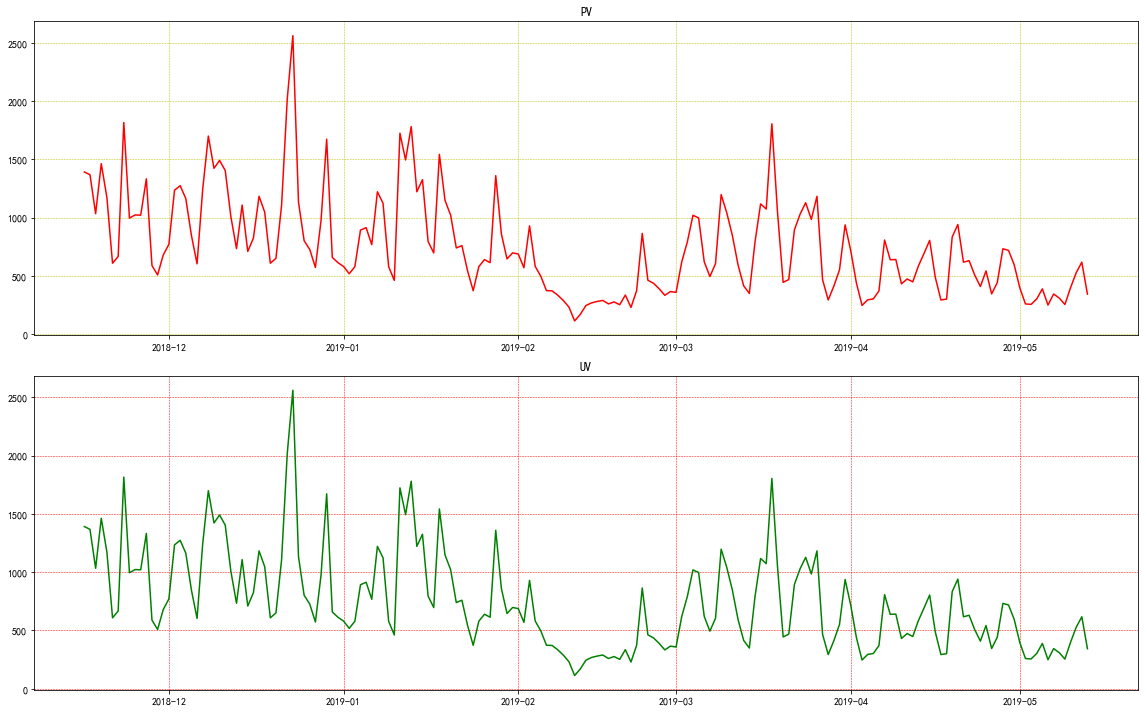

In [112]:
# 以总体维度下
total_pv = user_info["user_id"].count()
print("这个时间段内app的总访量为：{}".format(total_pv))
total_uv = user_info["user_id"].nunique()
print("这个时间段内独立访客数量为：{}".format(total_uv))
# 以日期维度下，每日总访问量统计
date_pv = user_info.groupby('datetime')["user_id"].count()
print(date_pv)
# 每日独立访客数量统计
date_uv = user_info.groupby('datetime')["user_id"].apply(lambda x:x.nunique())
print(date_uv)
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(date_pv,c="r")
plt.title('PV')
plt.grid(color='y', linestyle='--', linewidth=0.5)
plt.subplot(2,1,2)
plt.plot(date_pv,c="g")
plt.title('UV')
plt.tight_layout()
plt.grid(color='r', linestyle='--', linewidth=0.5)
plt.show()

# 任务4：用户消费行为价值分析

## 4.1用户流失率分析

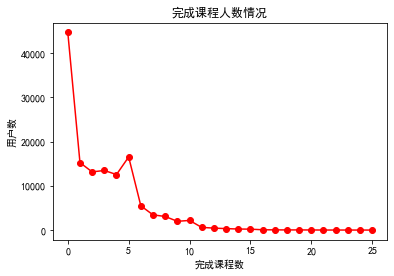

In [113]:
# 注册用户数  
login_users_counts = user_info[user_info['app_num']!=0].shape[0]
# 加入课程用户数
join_course_users_counts = login_day[login_day['camp_num']!=0].shape[0]
# 开始学习用户数 
start_study_users_counts = login_day[login_day['learn_num']!=0].shape[0] 
finish_num=list(login_day.groupby('finish_num')['user_id'].count().index)  #完成课程数
user_counts=list(login_day.groupby('finish_num')['user_id'].count().values) #完成相应课程的用户数
plt.plot(finish_num,user_counts,color='r',label='linear',marker='o')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("完成课程数")
plt.ylabel("用户数")
plt.title("完成课程人数情况")
# 根据画出的折线图，我们发现完成课程数为5时是一个转折点，因此我们小组将finish_num>=5作为判断用户结束课程学习的指标
finish_5courses_users_counts = login_day[login_day['finish_num']>=5].shape[0] 

In [114]:
#计算总体转化率和环节转化率
attr = ["注册","加入课程","开始学习","结课"]
values = [login_users_counts,join_course_users_counts,start_study_users_counts,finish_5courses_users_counts]
attr_data = pd.DataFrame({"环节":attr,"人数":values})
attr_data["总体转化率"] = round(attr_data.人数*100/attr_data.iloc[0,1],2) 
attr_data["环节转化率"] = round(attr_data.人数*100/attr_data.人数.shift(1).fillna(133935),2) 
print(attr_data)
#漏斗图-总体转化率
funnel1= Funnel(init_opts=opts.InitOpts(bg_color='#d9d6c3'))
funnel1.add(
    is_selected = True,
    series_name = "总体转化率",
    data_pair = [ z for z in zip(attr_data.环节,attr_data.总体转化率)],
                  )
funnel1.set_series_opts(
        label_opts = opts.LabelOpts(formatter='{b}:{c}%'),
)                      
funnel1.render_notebook() 

     环节      人数   总体转化率   环节转化率
0    注册  133935  100.00  100.00
1  加入课程  124367   92.86   92.86
2  开始学习  107406   80.19   86.36
3    结课   34726   25.93   32.33


In [115]:
# 漏斗图-单一环节转化率 
funnel2= Funnel(init_opts=opts.InitOpts(bg_color='#d9d6c3'))
funnel2.add(
    is_selected = True,
    series_name = "环节转化率",
    data_pair = [ z for z in zip(attr_data.环节,attr_data.环节转化率)],
                  )
funnel2.set_series_opts(
        label_opts = opts.LabelOpts(formatter='{b}:{c}%'),
)                      
funnel2.render_notebook() 

### 4.2  用户购买行为与领券行为的相关性分析

In [116]:
"""
新建consumer_behavior数据集包含变量user_id、first_order_time、first_order_price、
coupon、coupon_visit、click_buy、click_notUnlocked,应用于用户消费者行为价值分析。
"""
consumer_behavior = pd.DataFrame({'user_id':visit_info['user_id'],
                                  'coupon_visit':visit_info['coupon_visit'],'click_buy':visit_info['click_buy'],
                                  'click_notunlocked':visit_info['click_notunlocked']
                                 })
consumer_behavior = pd.merge(consumer_behavior,user_info[['user_id','first_order_time','first_order_price']],on='user_id')
consumer_behavior = pd.merge(consumer_behavior,login_day[['user_id','coupon']],on='user_id')

In [117]:
# 用户购买行为与领券行为的相关性分析
consumer_behavior1 = consumer_behavior.drop(columns=['first_order_time'])
print(consumer_behavior1)
consumer_behavior2 = consumer_behavior1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

                 user_id  coupon_visit  click_buy  click_notunlocked  \
0       2000001555945280             0          0                  0   
1       2000001556645228             0          0                  0   
2       2000001558047804             0          0                  0   
3       2000001558146467             1          0                  5   
4       2000001558146878             0          0                  0   
...                  ...           ...        ...                ...   
133930  2000002945827404             0          0                  0   
133931  2000002945862051             0          0                  0   
133932  2000002945866461             0          0                  0   
133933  2000002945873156             0          0                  0   
133934  2000002946803184             0          0                  0   

        first_order_price  coupon  
0                    0.00       0  
1                    0.00       0  
2                    0.00  

## 4.3  用户价值分析

Text(0, 0.5, 'user_counts')

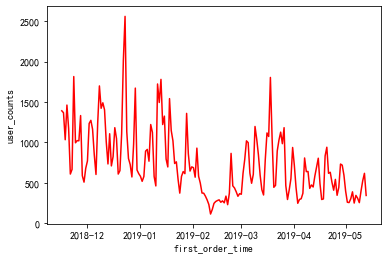

In [118]:
#画出体验课下单时间的人数分布图
plt.plot(user_info.groupby('datetime')['user_id'].count().index,user_info.groupby('datetime')['user_id'].count().values,color='r')
plt.xlabel('first_order_time')
plt.ylabel('user_counts')

In [119]:
'''字段说明
R:最近一次消费时间间隔
F:消费频率  #由于我们前面的计算发现没有重复的user_id，因此用户在此时间段内全部都是下单一次，即所有F都为1，所以不考虑F
M:消费金额
'''
#通过上面的折线图，我们发现在在2018年12月-2019年1月这个时间段下单的人数较多，因此，我们假设现在是2018年12月31日，分析最近30天的用户
#计算R、M值
user=user_info
user['datetime'] = pd.to_datetime(user['first_order_time'])
user['year']=user['datetime'].dt.year
user['month']=user['datetime'].dt.month
user['day']=user['datetime'].dt.day
user_value_id=user_info[(user['year']==2018)&(user['month']==12)] #提取下单时间在2018年12月的用户信息
user_value_id.index=range(0,len(user_value_id))#将索引值重新排序
user_value=pd.DataFrame((np.ones((len(user_value_id),8))))#重新构建一个数据框，用来记录R、F、M
user_value.columns=('user_id','R','M','R值打分','M值打分','R值高低','M值高低','用户分类')
user_value['user_id']=user_value_id['user_id']
user_value['R']=31-user_value_id['day']
user_value['M']=user_value_id['first_order_price']

In [120]:
#给R、M值按照指标的价值打分
print(user_value['R'].describe())
print(user_value['M'].describe())
# R<3记5分，R为3～5记4分，R为5～10记3分，R为10～20记2分，R>20记1分
# M>120记5分，M为90～120记4分，M为50～90记3分，M为10～50记2分，M为10以内记1分
user_value.loc[user_value['R']<3,'R值打分']=5
user_value.loc[(user_value['R']>=3)&(user_value['R']<5),'R值打分']=4
user_value.loc[(user_value['R']>=5)&(user_value['R']<10),'R值打分']=3
user_value.loc[(user_value['R']>=10)&(user_value['R']<20),'R值打分']=2
user_value.loc[user_value['R']>=20,'R值打分']=1

user_value.loc[user_value['M']<10,'M值打分']=1
user_value.loc[(user_value['M']>=10)&(user_value['M']<50),'M值打分']=2
user_value.loc[(user_value['M']>=50)&(user_value['M']<90),'M值打分']=3
user_value.loc[(user_value['M']>=90)&(user_value['M']<120),'M值打分']=4
user_value.loc[user_value['M']>=120,'M值打分']=5
#计算R、M值高低
user_value.loc[user_value['R值打分']>user_value['R值打分'].mean(),'R值高低']='高'
user_value.loc[user_value['R值打分']<=user_value['R值打分'].mean(),'R值高低']='低'

user_value.loc[user_value['M值打分']>user_value['M值打分'].mean(),'M值高低']='高'
user_value.loc[user_value['M值打分']<=user_value['M值打分'].mean(),'M值高低']='低'

#用户分类
user_value.loc[(user_value['R值高低']=='高')&(user_value['M值高低']=='高'),'用户分类']='重要发展用户'
user_value.loc[(user_value['R值高低']=='低')&(user_value['M值高低']=='高'),'用户分类']='重要挽留用户'
user_value.loc[(user_value['R值高低']=='高')&(user_value['M值高低']=='低'),'用户分类']='一般发展用户'
user_value.loc[(user_value['R值高低']=='低')&(user_value['M值高低']=='低'),'用户分类']='一般挽留用户'
user_value.groupby('用户分类')['user_id'].count() #统计各类用户的总量

count    33841.000000
mean        15.283739
std          8.713118
min          0.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: R, dtype: float64
count    33841.000000
mean         1.175674
std          3.921740
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        149.000000
Name: M, dtype: float64


用户分类
一般发展用户    11719
一般挽留用户    22106
重要发展用户        4
重要挽留用户       12
Name: user_id, dtype: int64